In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nytfug/sample_submission.csv
/kaggle/input/nytfug/train.csv
/kaggle/input/nytfug/test.csv


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 8]
plt.style.use('ggplot')

In [3]:
!ls ../input/nytfug

sample_submission.csv  test.csv  train.csv


In [4]:
id2label = {0: 'Galaxy', 1: 'Quasar', 2: 'Star'}
train = pd.read_csv('../input/nytfug/train.csv')
train['label_str'] = train['label'].map(id2label)
test = pd.read_csv('../input/nytfug/test.csv')

train

,id,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,label,label_str
0,0,1.237666e+18,223.818272,19.918549,20.01995,18.61652,17.81234,17.36830,17.05670,4678,3,148,3.142504e+18,0.178004,2791,54556,427,0,Galaxy
1,1,1.237668e+18,207.866352,21.651873,17.87874,16.72789,16.71315,16.75816,16.82370,5183,5,490,3.117752e+18,-0.000041,2769,54527,491,2,Star
2,2,1.237679e+18,328.585779,2.229687,27.14565,22.64610,20.92246,19.83694,19.23603,7712,4,120,5.795190e+18,0.558458,5147,55854,667,0,Galaxy
3,3,1.237681e+18,330.900844,30.407209,23.89204,22.71284,21.21638,20.03538,19.33082,8156,4,69,6.711640e+18,-0.000103,5961,56460,549,2,Star
4,4,1.237662e+18,250.743112,23.739861,18.41437,16.64718,15.73495,15.23219,14.81856,3926,3,178,1.592087e+18,0.030478,1414,53135,233,0,Galaxy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,1.237653e+18,355.698647,15.987114,20.66461,20.15440,19.99736,19.95367,19.80753,1739,6,275,6.910872e+18,2.223236,6138,56598,358,1,Quasar
59996,59996,1.237652e+18,203.015451,-0.006551,19.47603,17.44049,16.50496,16.07710,15.72066,1404,3,27,3.344014e+17,0.078075,297,51959,33,0,Galaxy
59997,59997,1.237665e+18,202.351675,33.435394,19.35185,18.26821,17.71434,17.40701,17.25548,4576,3,544,2.244001e+18,0.108333,1993,53762,299,0,Galaxy
59998,59998,1.237661e+18,160.690763,39.307690,22.45191,22.35734,21.99017,21.85263,22.02231,3647,2,142,9.932934e+18,1.230738,8822,58167,891,1,Quasar


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27998 entries, 0 to 27997
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           27998 non-null  int64  
 1   obj_ID       27998 non-null  float64
 2   alpha        27998 non-null  float64
 3   delta        27998 non-null  float64
 4   u            27998 non-null  float64
 5   g            27998 non-null  float64
 6   r            27998 non-null  float64
 7   i            27998 non-null  float64
 8   z            27998 non-null  float64
 9   run_ID       27998 non-null  int64  
 10  cam_col      27998 non-null  int64  
 11  field_ID     27998 non-null  int64  
 12  spec_obj_ID  27998 non-null  float64
 13  redshift     27998 non-null  float64
 14  plate        27998 non-null  int64  
 15  MJD          27998 non-null  int64  
 16  fiber_ID     27998 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 3.6 MB


In [6]:
train['label_str'].value_counts()

Galaxy    35746
Star      12960
Quasar    11294
Name: label_str, dtype: int64

In [7]:
train["label_str"].value_counts(normalize = True)

Galaxy    0.595767
Star      0.216000
Quasar    0.188233
Name: label_str, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


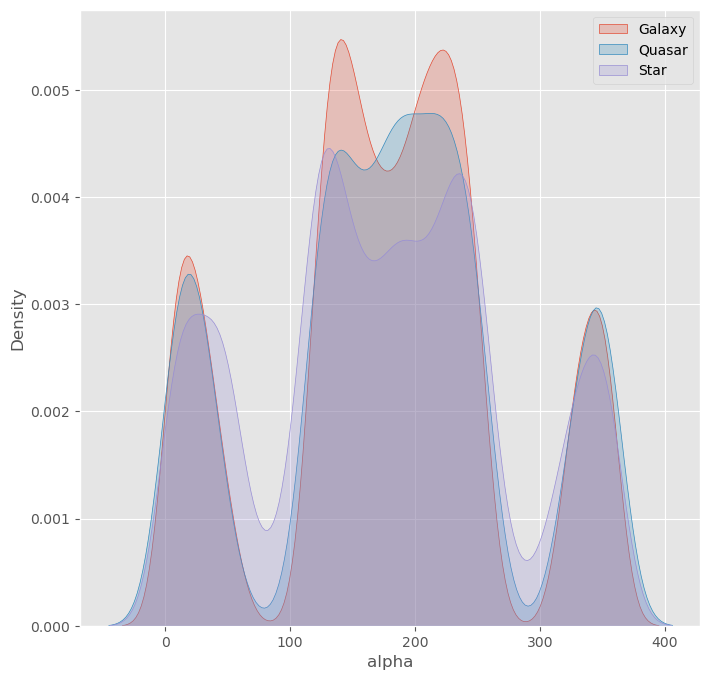

In [8]:
for i in range(3):
    sns.kdeplot(data = train[train["label"] == i]["alpha"], shade = True, label = id2label[i])
plt.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


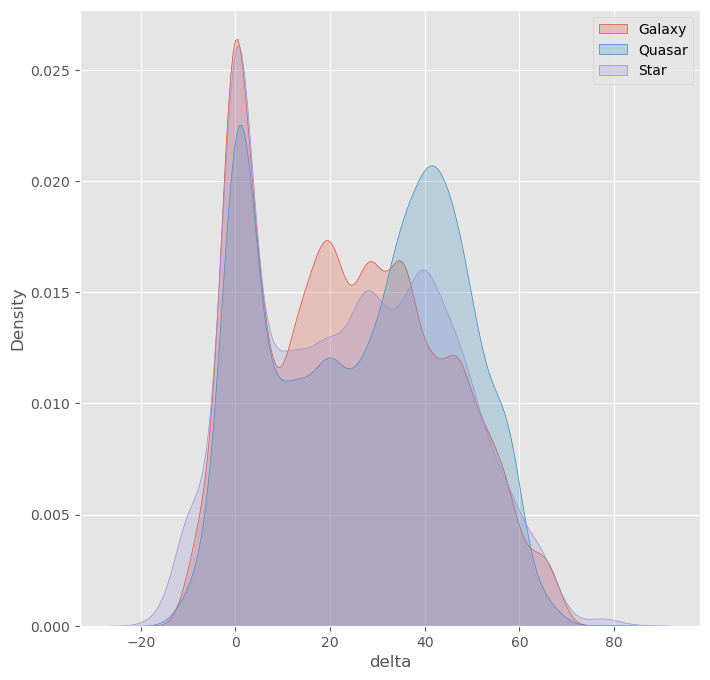

In [9]:
for i in range(3):
    sns.kdeplot(data = train[train["label"] == i]["delta"], shade = True, label = id2label[i])
plt.legend()

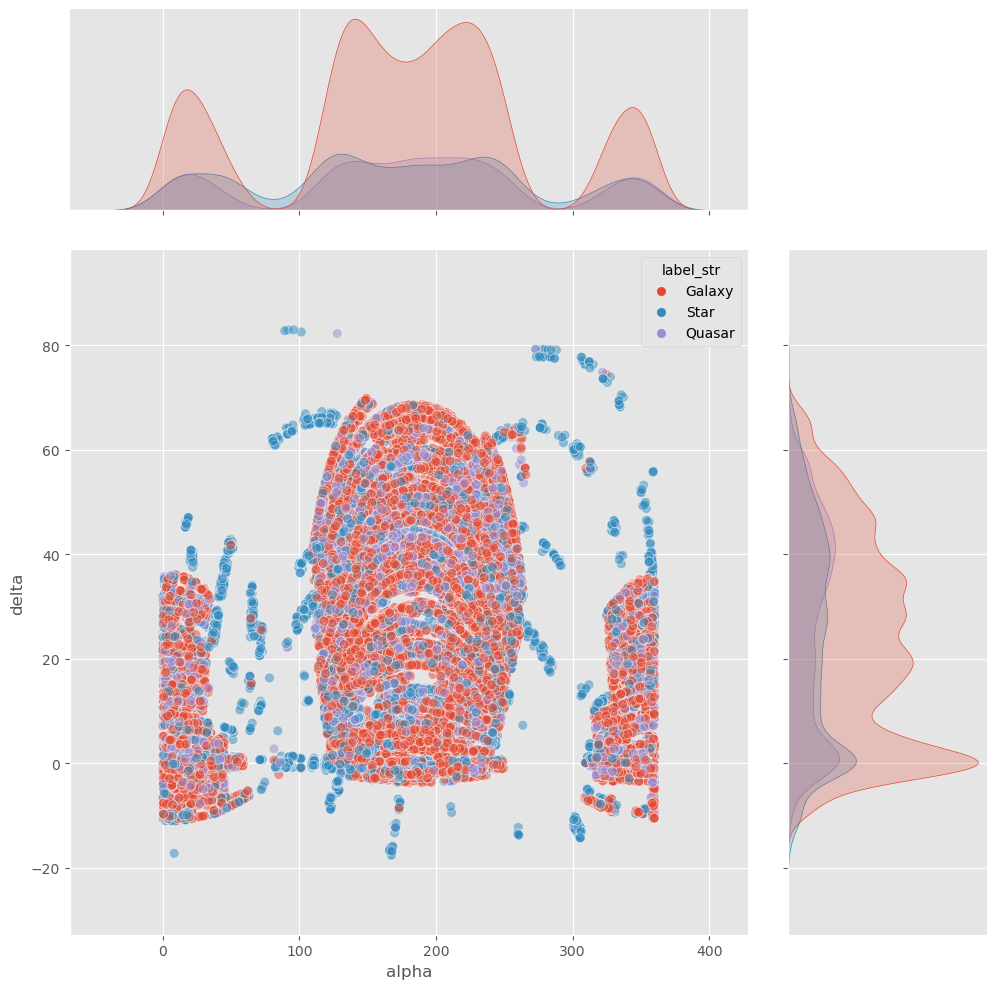

In [10]:
sns.jointplot(data = train, x = "alpha", y = "delta", hue = "label_str", s = 50, alpha = 0.5, height = 10, ratio = 3);

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


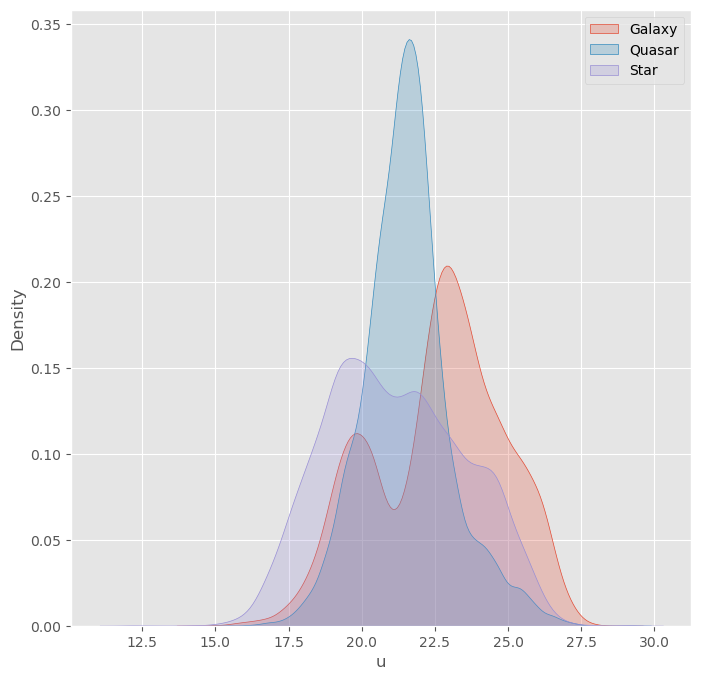

In [11]:
for i in range(3):
    sns.kdeplot(data = train[train["label"] == i]["u"], shade = True, label = id2label[i])
plt.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


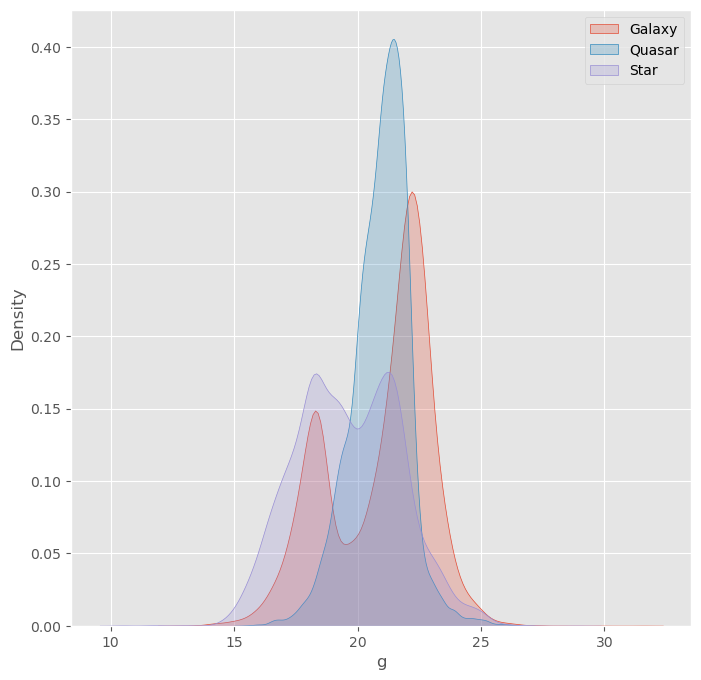

In [12]:
for i in range(3):
    sns.kdeplot(data = train[train["label"] == i]["g"], shade = True, label = id2label[i])
plt.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


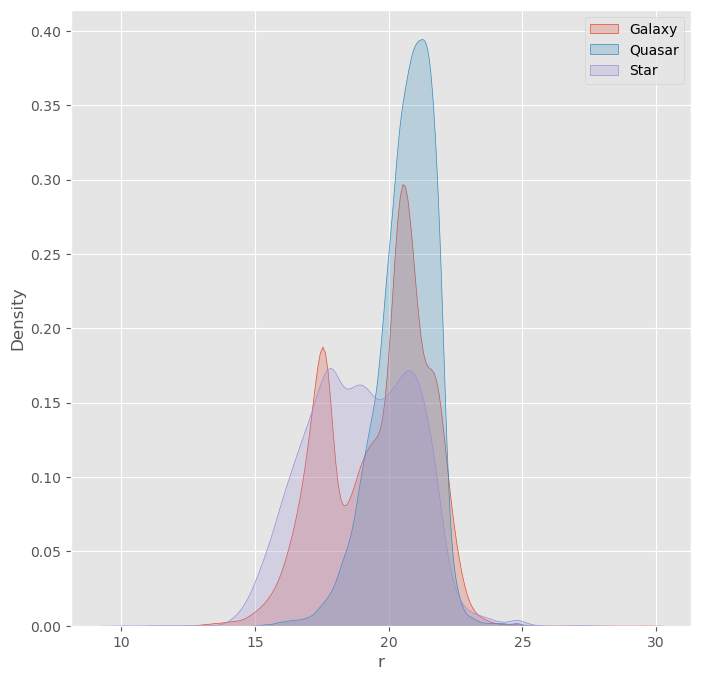

In [13]:
for i in range(3):
    sns.kdeplot(data = train[train["label"] == i]["r"], shade = True, label = id2label[i])
plt.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


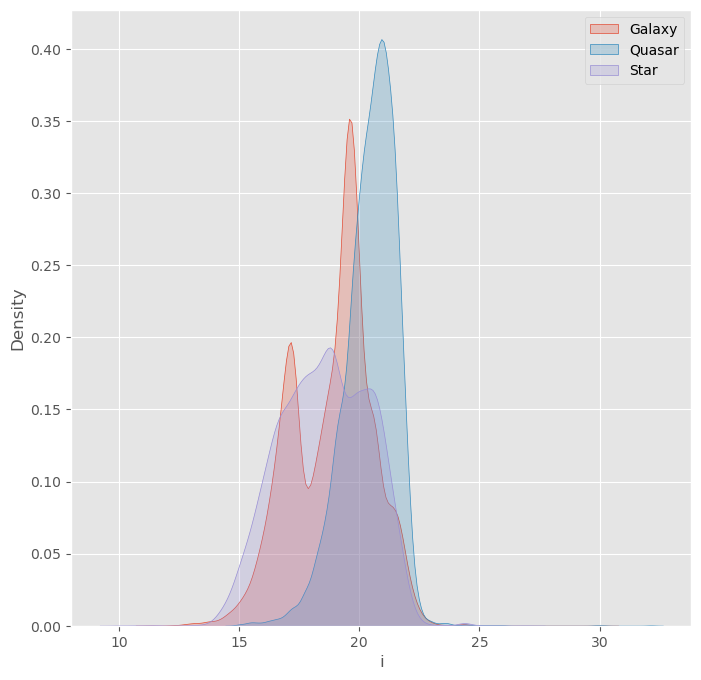

In [14]:
for i in range(3):
    sns.kdeplot(data = train[train["label"] == i]["i"], shade = True, label = id2label[i])
plt.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


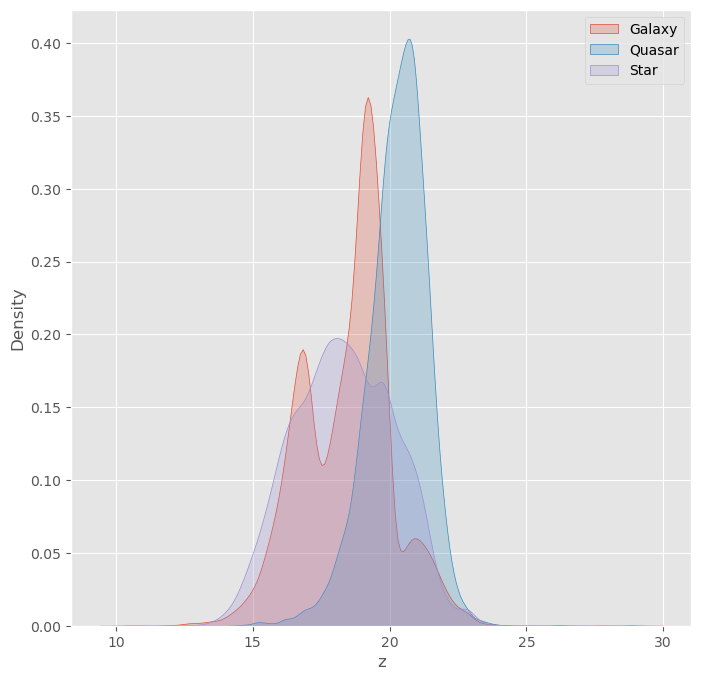

In [15]:
for i in range(3):
    sns.kdeplot(data = train[train["label"] == i]["z"], shade = True, label = id2label[i])
plt.legend()

## Creating Interaction

In [16]:
train["alpha_delta"] = train["alpha"] * train["delta"]
test["alpha_delta"] = test["alpha"] * test["delta"]

## Training

In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn import preprocessing

In [18]:
features = [
    'alpha',
    'delta',
    # 'alpha_delta',
    'u',
    'g',
    'r',
    'i',
    'z'
]

In [19]:
accs = []
pred_test = []

In [20]:
df_sub = test[["id"]].copy()

In [21]:
n_splits = 5
kf = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)

In [22]:
features = [
    'alpha',
    'delta',
    # 'alpha_delta', 
    'u',
    'g',
    'r',
    'i',
    'z'
]

accs = []
preds_test = []

df_sub = test[['id']].copy()

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
for fold, (tr, val) in enumerate(kf.split(train[features], train['label'])):
    print('FOLD:', fold)
    
    # split
    X_train = train.loc[tr, features]
    y_train = train.loc[tr, 'label']
    X_val = train.loc[val, features]
    y_val = train.loc[val, 'label']
    X_test = test[features]
    
    # standardize
    scaler = preprocessing.StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    # fit
    model = LogisticRegression(
        n_jobs=-1,
        random_state=1,
        max_iter=500
        # solver='sag',
        # max_iter=1000
    )
    model.fit(X_train, y_train)
    
    # predict
    preds = model.predict(X_val)
    
    # predict on test set
    df_sub[f'fold_{fold}'] = model.predict(X_test)
    
    # metrics
    report = metrics.classification_report(y_val, preds, target_names=[f'{x[1]} ({x[0]})' for x in id2label.items()])
    acc = metrics.accuracy_score(y_val, preds)
    print(report)
    print('Accuracy:', acc)
    print()
    accs.append(acc)
    
print('-' * 50)
print('Mean:', np.mean(accs))
print('Std:', np.std(accs))

FOLD: 0
              precision    recall  f1-score   support

  Galaxy (0)       0.81      0.91      0.86      7150
  Quasar (1)       0.68      0.79      0.73      2258
    Star (2)       0.70      0.34      0.46      2592

    accuracy                           0.77     12000
   macro avg       0.73      0.68      0.68     12000
weighted avg       0.76      0.77      0.75     12000

Accuracy: 0.7658333333333334

FOLD: 1
              precision    recall  f1-score   support

  Galaxy (0)       0.81      0.91      0.85      7149
  Quasar (1)       0.68      0.80      0.73      2259
    Star (2)       0.68      0.33      0.45      2592

    accuracy                           0.76     12000
   macro avg       0.72      0.68      0.68     12000
weighted avg       0.75      0.76      0.74     12000

Accuracy: 0.7631666666666667

FOLD: 2
              precision    recall  f1-score   support

  Galaxy (0)       0.81      0.90      0.85      7149
  Quasar (1)       0.66      0.79      0.72  

In [23]:
df_sub

,id,fold_0,fold_1,fold_2,fold_3,fold_4
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,2,0,0,0,0,0
3,3,0,0,0,0,0
4,4,1,1,1,1,1
...,...,...,...,...,...,...
27993,27993,0,0,0,0,0
27994,27994,0,0,0,0,0
27995,27995,0,0,0,0,0
27996,27996,1,1,1,1,1


In [24]:
df_sub.iloc[:, 1:].value_counts()

fold_0  fold_1  fold_2  fold_3  fold_4
0       0       0       0       0         18519
1       1       1       1       1          6212
2       2       2       2       2          2974
                        0       2            48
0       0       0       0       2            30
        1       1       1       1            21
2       0       0       0       2            19
                                0            16
0       0       1       0       0            13
1       2       1       1       1            12
2       0       2       0       2             9
1       2       2       2       2             9
                1       1       2             9
0       2       2       2       2             7
2       2       2       0       0             7
1       1       2       1       1             7
0       1       1       1       0             6
        0       2       0       2             6
        1       0       0       0             6
                        1       0             5
 

In [25]:
df_sub["label"] = df_sub.iloc[:, 1:].mode(axis = 1)
df_sub

,id,fold_0,fold_1,fold_2,fold_3,fold_4,label
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,1,1,1,1,1,1
...,...,...,...,...,...,...,...
27993,27993,0,0,0,0,0,0
27994,27994,0,0,0,0,0,0
27995,27995,0,0,0,0,0,0
27996,27996,1,1,1,1,1,1


<AxesSubplot:>

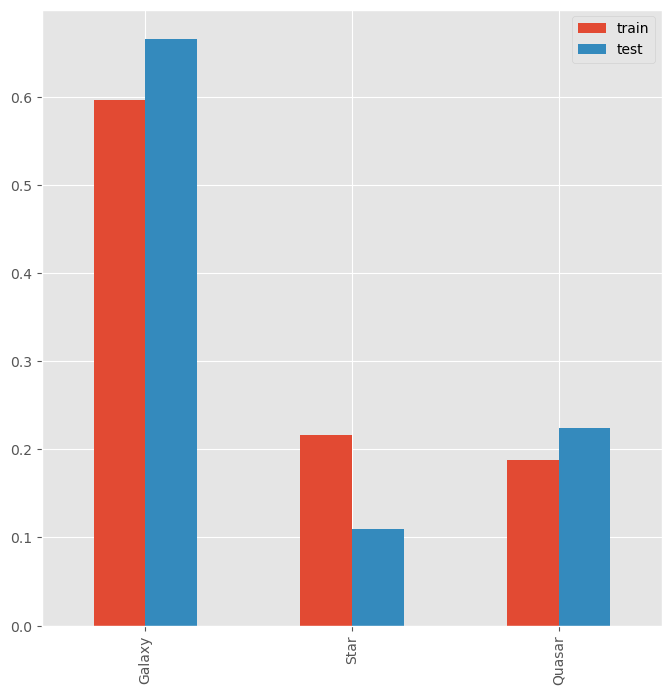

In [26]:
pd.concat([
    train["label"].map(id2label).value_counts(normalize = True).rename("train"),
    df_sub["label"].map(id2label).value_counts(normalize = True).rename("test")
], axis = 1).plot.bar()

In [27]:
df_sub[["id", "label"]].to_csv("submission.csv", index = False)

In [28]:
df_sub.head(5)

,id,fold_0,fold_1,fold_2,fold_3,fold_4,label
0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,2,0,0,0,0,0,0
3,3,0,0,0,0,0,0
4,4,1,1,1,1,1,1
